# Probabilistic Data Mining Lab 1
### Mariia Zameshina, Pasha Fedosov, Aidan Mannion, Charles Marshall

In [67]:
%load_ext autoreload
%autoreload 2
from sklearn import mixture
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import altair as alt
import statistics as stat
alt.renderers.enable('notebook')
import os
import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Preparatory Lab Work and Modeling

Questions 1 and 4 of this section are provided in our lab report. Here, we provide figures for the simulated sample with the asked parameters (questions 2 & 3), and for the unistroke letter A data.

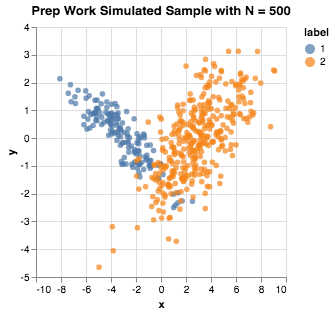

In [75]:
x,y = np.random.multivariate_normal([-3,0], [[5,-2],[-2,1]], size = 150).T
x2, y2 = np.random.multivariate_normal([3,0], [[5,2],[2,2]], 350).T

A = util.get_data("./Unistroke/",*[f for f in os.listdir("./Unistroke/") if ((f[0] == 'A') and (f[1] != 'm'))])
flag = 0
for item in list(A):
    if item[0] < 0:
        continue
    elif flag == 0:
        new = np.array(item)
        flag = 1
    else:
        new = np.vstack((new, item))
A = new

util.plot(util.df_fromarr(x = list(x) + list(x2),\
                        y = list(y) + list(y2),\
                        label = [1]*150 +[2]*350),"Prep Work Simulated Sample with N = 500")
       

### 2. Data Analysis: Gaussian Model
We first provide the unlabeled data for A and Amerge, followed by the estimated labels and parameters printed below. 

If the A data does not get well-sorted, please run the next cell multiple times. We provide coments on this behavior in our report. 

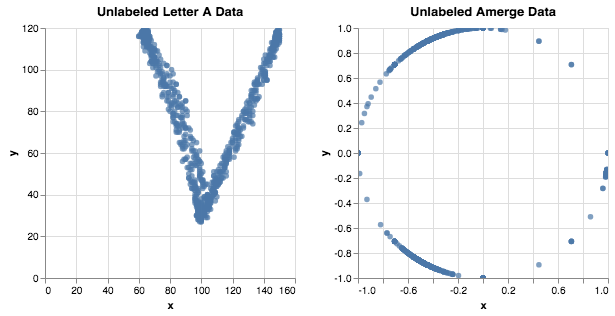

Parameters for A Data:
Mean of class 0 = [78.61, 87.78], (co)-variance of class 0 = [[353.64, 613.51], [613.51, 1075.27]]
Mean of class 1 = [122.63, 69.19], (co)-variance of class 1 = [[178.64, -361.88], [-361.88, 776.99]]

Parameters for Amerge Data:
Mean of class 0 = [-0.37, 0.91], (co)-variance of class 0 = [[0.27, 0.08], [0.08, 0.12]]
Mean of class 1 = [-0.3, -0.72], (co)-variance of class 1 = [[0.04, 0.01], [0.01, 0.01]]



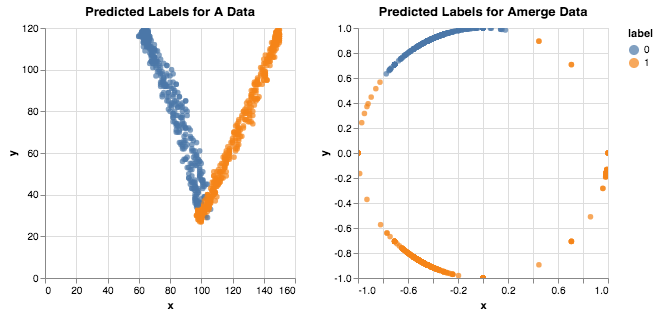

In [82]:
GMM = mixture.GaussianMixture(n_components = 2)
A_labeled_df = util.df_fromarr(x = [x[0] for x in A],\
                                    y = [x[1] for x in A],\
                                    label= GMM.fit_predict(A))
A_fitted = A_GMM.fit_predict(A)
Amerge = util.get_data("./Unistroke/", "Amerge.txt")
Amerge_GMM = mixture.GaussianMixture(n_components = 2)
Amerge_labeled_df = util.df_fromarr(x = [x[0] for x in Amerge],\
                                    y = [x[1] for x in Amerge],\
                                    label= Amerge_GMM.fit_predict(Amerge))

util.plot(util.df_fromarr(x = [x[0] for x in A],\
                        y = [x[1] for x in A]), "Unlabeled Letter A Data",\
          util.df_fromarr(x=[x[0] for x in Amerge],\
                          y=[x[1] for x in Amerge]), "Unlabeled Amerge Data")

util.plot(A_labeled_df, "Predicted Labels for A Data",\
        Amerge_labeled_df, "Predicted Labels for Amerge Data")
     
util.mean_variance(A_labeled_df, name = "A Data")
util.mean_variance(Amerge_labeled_df, name = "Amerge Data")

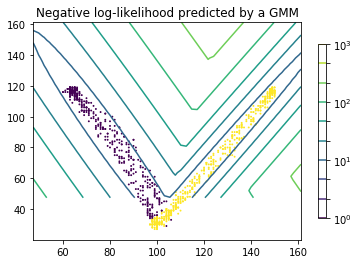

/Users/CharlesMarshall/Desktop/m2s1/probabilistic_data_mining/lab1/util.py:64: UserWarning: Log scale: values of z <= 0 have been masked
  XX = np.array([x.ravel(), y.ravel()]).T


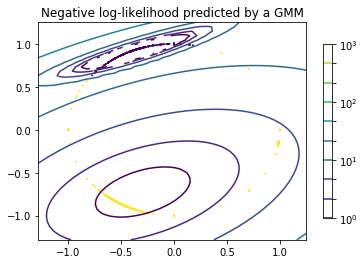

In [88]:
util.plot_pdf(Amerge_GMM.fit(A), A, Amerge_GMM.fit_predict(A))
util.plot_pdf(Amerge_GMM.fit(Amerge), Amerge, Amerge_GMM.fit_predict(Amerge))
